# Movie Recommender System

![FlickFlare Logo](Images_Movie_Recommendation_System/FlickFlareLogo.PNG)




# Movie Recommender System
## Overview: FlickFlare

FlickFlare is a cutting-edge movie streaming platform designed to bring a diverse and expansive collection of films directly to your screen. Whether you're a fan of classic cinema, indie gems, or the latest blockbuster hits, FlickFlare has something for everyone.

To enhance user satisfaction and ensure that our movie recommendations align with user interests, we are introducing a sophisticated movie recommender system. This system will leverage user ratings and genre preferences to suggest the top 5 movies tailored to individual tastes.

## Business Understanding
### Problem Statement

FlickFlare, a movie streaming company, received feedback from users on the Google Play Store indicating that the movies recommended to them did not match their interests, leading to customer dissatisfaction.

To address this issue, FlickFlare has approached us, a data analytics company, to build a movie recommender system. This system will aid in suggesting the top 5 movies to users based on their ratings and preferred genres.

## Objectives

###  Main Objective

    To build a movie recommender system that suggests top movies to streaming users based on movie ratings and preferred genres.

### Specific Objectives

    To find out the average rating of movies.
    To determine the number of movies per genre.
    To identify the most popular movies.

### Metric for Success

We will use RMSE (Root Mean Square Error) as our metric for success, with the model having the lowest RMSE score being our best model.

### Data Understanding

The data used has been sourced from the MovieLens dataset from the GroupLens research lab at the University of Minnesota.

It contains 100,836 ratings and 3,683 tag applications across 9,742 movies. These data were created by 610 users.

The dataset is distributed among four CSV files:

    links.csv
    movies.csv
    ratings.csv
    tags.csv

1. movies.csv

Each line of this file after the header row represents one movie and has the following columns:

    movieId: Unique ID for each movie
    title: Name of the movie followed by its year of release
    genres: Categories that a movie might fall into, separated by |

2. links.csv

This file contains identifiers that can be used to link this data to other data sources like IMDb. Each line of this file after the header row represents one IMDb link and has the following columns:

    movieId: Unique ID for each movie as used by MovieLens
    imdbId: Unique ID for each movie as used by IMDb
    tmdbId: Unique ID for each movie as used by The Movie Database (TMDb)

3. tags.csv

Each line of this file after the header row represents one tag applied to one movie by one user and has the following columns:

    userId: Unique ID for each user
    movieId: Unique ID for each movie
    tag: User-generated metadata about the movie in the form of short, meaningful phrases
    timestamp: Time when the tag was provided by the user

4. ratings.csv

Each line of this file after the header row represents one rating and has the following columns:

    userId: Unique ID for each user
    movieId: Unique ID for each movie
    rating: Rating given by the user for the movie. Ratings are made on a 5-star scale with 0.5 increments
    timestamp: Time when the rating was given

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import random
import pickle

# Installing the surprise package for collaborative filtering algorithms
!pip install surprise

from surprise import Dataset, Reader, SVD
from surprise.prediction_algorithms import KNNBasic, KNNWithMeans, KNNWithZScore, KNNBaseline
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for seaborn plots
sns.set_style('whitegrid')
%matplotlib inline

# Setting the font size for all plots
font = {'size': 16}
plt.rc('font', **font)

# Loading the MovieLens dataset
data = Dataset.load_builtin('ml-100k')

# Defining a Reader to parse the data
reader = Reader('ml-100k')

# Splitting the dataset into training and testing sets
trainset, testset = train_test_split(data, test_size=0.25)

# Initialize a list of algorithms to evaluate
algorithms = [
    KNNBasic,
    KNNWithMeans,
    KNNWithZScore,
    KNNBaseline,
    SVD,
    SVDpp
]

# Evaluating each algorithm using cross-validation
results = {}
for algo_class in algorithms:
    algo = algo_class()
    cv_results = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=True)
    results[algo_class.__name__] = cv_results['test_rmse'].mean()

# Printing the results
print("\nAverage RMSE for each algorithm:")
for algo_name, rmse in results.items():
    print(f"{algo_name}: {rmse}")

# Selecting the best algorithm
best_algo_name = min(results, key=results.get)
print(f"\nBest algorithm: {best_algo_name}")

# Training the best algorithm on the entire training set
best_algo = eval(best_algo_name)()
best_algo.fit(trainset)

# Making predictions on the test set
predictions = best_algo.test(testset)

# Displaying sample predictions
for i in range(10):
    print(predictions[i])

# Saving the trained model
with open('best_algo_model.pkl', 'wb') as f:
    pickle.dump(best_algo, f)

# Loading the saved model (for demonstration purposes)
with open('best_algo_model.pkl', 'rb') as f:
    loaded_algo = pickle.load(f)

# Making a prediction with the loaded model
sample_user_id = str(random.choice(testset)[0])
sample_movie_id = str(random.choice(testset)[1])
prediction = loaded_algo.predict(sample_user_id, sample_movie_id)
print(f"\nPrediction for user {sample_user_id} and movie {sample_movie_id}: {prediction.est}")


In [6]:
import pandas as pd

# Reading the different datasets into pandas DataFrames
tags_df = pd.read_csv('tags.csv')
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')
links_df = pd.read_csv('links.csv')

# Displaying the first few rows of each DataFrame to confirm successful loading
print("Tags DataFrame:")
print(tags_df.head())

print("\nMovies DataFrame:")
print(movies_df.head())

print("\nRatings DataFrame:")
print(ratings_df.head())

print("\nLinks DataFrame:")
print(links_df.head())


Tags DataFrame:
   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200

Movies DataFrame:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Ratings DataFrame:
   userId  movieId  rating  timestamp
0       1        1     4

### Inspect and Handle Missing Values

    Check for Missing Values: We will determine if there are any missing values in the DataFrames.

In [7]:
print("Missing values in tags_df:")
print(tags_df.isnull().sum())

print("\nMissing values in movies_df:")
print(movies_df.isnull().sum())

print("\nMissing values in ratings_df:")
print(ratings_df.isnull().sum())

print("\nMissing values in links_df:")
print(links_df.isnull().sum())


Missing values in tags_df:
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

Missing values in movies_df:
movieId    0
title      0
genres     0
dtype: int64

Missing values in ratings_df:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Missing values in links_df:
movieId    0
imdbId     0
tmdbId     8
dtype: int64


### Review Missing Data: 
Identify the records with missing tmdbId values to understand the extent of the missing data.

In [8]:
missing_tmdb_ids = links_df[links_df['tmdbId'].isnull()]
print("Records with missing tmdbId:")
print(missing_tmdb_ids)


Records with missing tmdbId:
      movieId  imdbId  tmdbId
624       791  113610     NaN
843      1107  102336     NaN
2141     2851   81454     NaN
3027     4051   56600     NaN
5532    26587   92337     NaN
5854    32600  377059     NaN
6059    40697  105946     NaN
7382    79299  874957     NaN


In [9]:
# Handling missing values in links_df
missing_tmdb_ids = links_df[links_df['tmdbId'].isnull()]
print("\nRecords with missing tmdbId:")
print(missing_tmdb_ids)

Drop rows with missing tmdbId
links_df.dropna(subset=['tmdbId'], inplace=True)


Records with missing tmdbId:
      movieId  imdbId  tmdbId
624       791  113610     NaN
843      1107  102336     NaN
2141     2851   81454     NaN
3027     4051   56600     NaN
5532    26587   92337     NaN
5854    32600  377059     NaN
6059    40697  105946     NaN
7382    79299  874957     NaN


In [10]:
# Check for any remaining missing values in all DataFrames
print("\nMissing values in tags_df:")
print(tags_df.isnull().sum())

print("\nMissing values in movies_df:")
print(movies_df.isnull().sum())

print("\nMissing values in ratings_df:")
print(ratings_df.isnull().sum())

print("\nMissing values in links_df:")
print(links_df.isnull().sum())



Missing values in tags_df:
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

Missing values in movies_df:
movieId    0
title      0
genres     0
dtype: int64

Missing values in ratings_df:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Missing values in links_df:
movieId    0
imdbId     0
tmdbId     0
dtype: int64


In [11]:
# Check for duplicates in all DataFrames
print("\nDuplicates in tags_df:")
print(tags_df.duplicated().sum())

print("\nDuplicates in movies_df:")
print(movies_df.duplicated().sum())

print("\nDuplicates in ratings_df:")
print(ratings_df.duplicated().sum())

print("\nDuplicates in links_df:")
print(links_df.duplicated().sum())

# Remove duplicates if found
tags_df.drop_duplicates(inplace=True)
movies_df.drop_duplicates(inplace=True)
ratings_df.drop_duplicates(inplace=True)
links_df.drop_duplicates(inplace=True)



Duplicates in tags_df:
0

Duplicates in movies_df:
0

Duplicates in ratings_df:
0

Duplicates in links_df:
0


In [12]:
#Check and Fix Data Types: Ensure columns have the correct data types
print("\nData types in tags_df:")
print(tags_df.dtypes)

print("\nData types in movies_df:")
print(movies_df.dtypes)

print("\nData types in ratings_df:")
print(ratings_df.dtypes)

print("\nData types in links_df:")
print(links_df.dtypes)




Data types in tags_df:
userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

Data types in movies_df:
movieId     int64
title      object
genres     object
dtype: object

Data types in ratings_df:
userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

Data types in links_df:
movieId      int64
imdbId       int64
tmdbId     float64
dtype: object


In [13]:
# Convert timestamp columns to datetime
tags_df['timestamp'] = pd.to_datetime(tags_df['timestamp'], unit='s')
ratings_df['timestamp'] = pd.to_datetime(ratings_df['timestamp'], unit='s')


In [14]:
#Split genres into multiple columns
genres_expanded = movies_df['genres'].str.get_dummies(sep='|')
movies_df = pd.concat([movies_df, genres_expanded], axis=1)


### Exploratory Data Analysis (EDA):
Conduct EDA to understand distributions and relationships in your data.

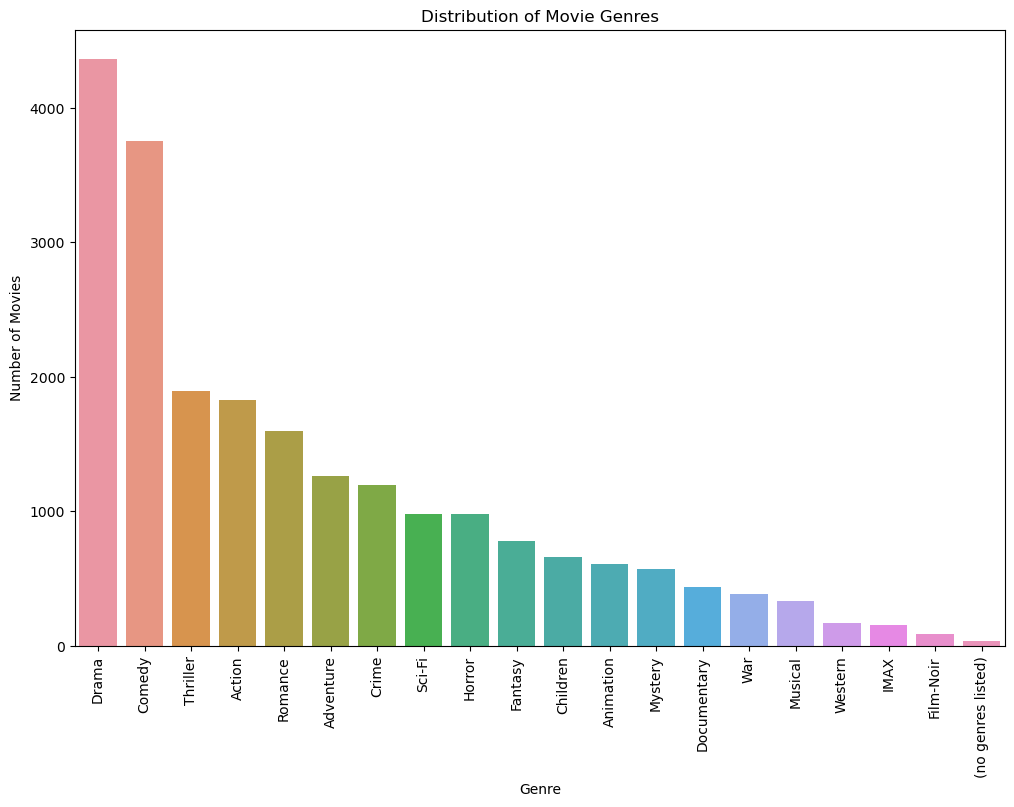

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


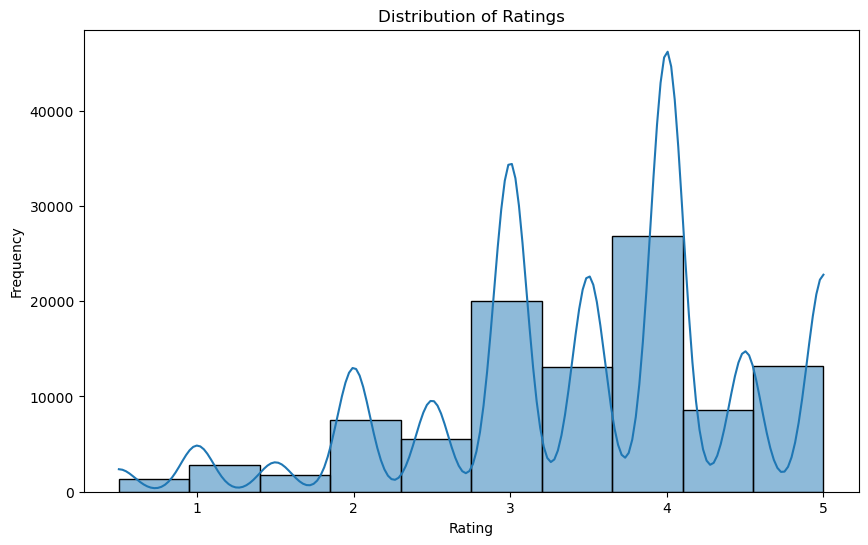

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
# Distribution of movie genres
plt.figure(figsize=(12, 8))
genre_counts = movies_df[genres_expanded.columns].sum().sort_values(ascending=False)
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Distribution of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()

# Example: Rating distribution
plt.figure(figsize=(10, 6))
sns.histplot(ratings_df['rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


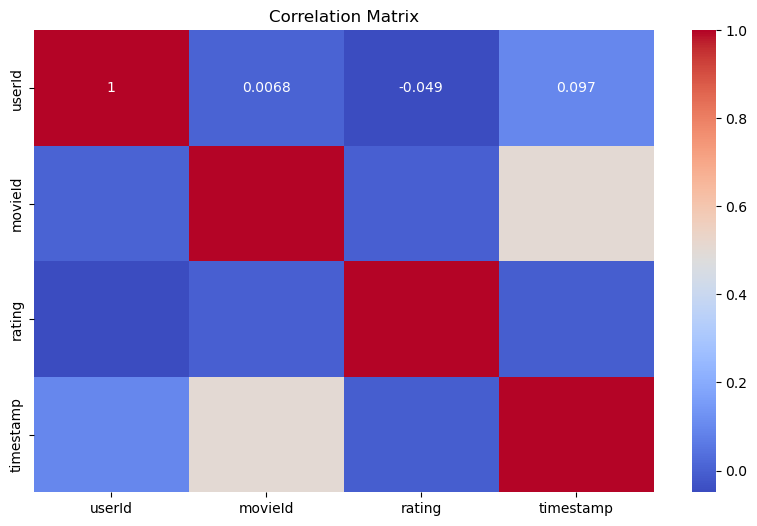

In [25]:
# Correlation matrix
plt.figure(figsize=(10, 6))
corr_matrix = ratings_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
